Here is the heat map showing an extensive amount of correlation

C:\Users\tyler\AppData\Local\Temp/ipykernel_1028/1622392616.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


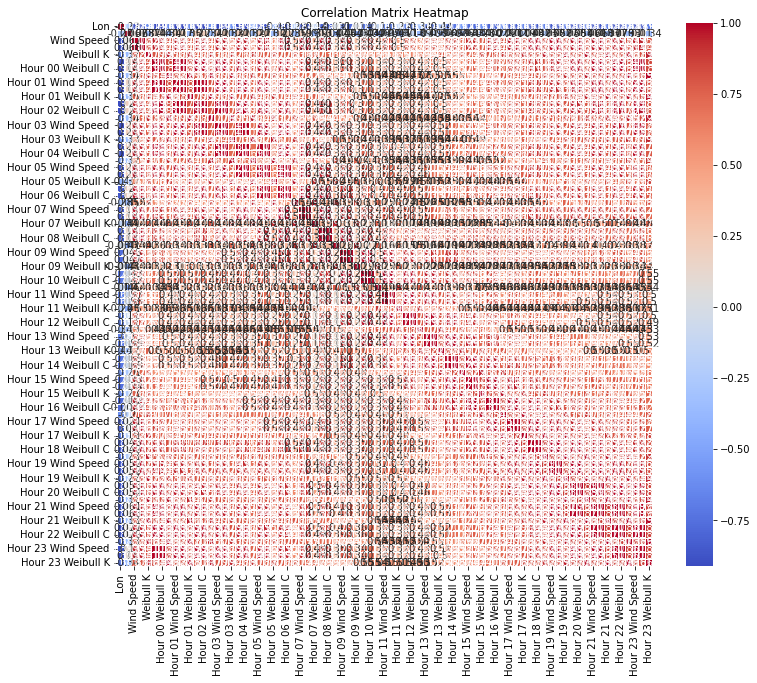

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./wind_speed_annual/wind_speed_annual.csv")


# Compute the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [34]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Use a regular expression to replace numbers with an empty string
df['Block'] = df['Block'].str.replace('\d+', '', regex=True)

print(df['Block'].head())

# Set the threshold
threshold = 0.90

# List to keep track of columns to drop
columns_to_drop = set()

# Iterate over the columns of the correlation matrix
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[j]
            columns_to_drop.add(colname)

# Drop the identified columns
reduced_df = df.drop(columns=columns_to_drop)

print(f"Original dataframe had {df.shape[1]} columns. Reduced dataframe has {reduced_df.shape[1]} columns.")
print(reduced_df.head())

C:\Users\tyler\AppData\Local\Temp/ipykernel_1028/358712037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


0     NF--
1     NF--
2     NF--
3     NF--
4     NF--
Name: Block, dtype: object
Original dataframe had 78 columns. Reduced dataframe has 7 columns.
   Block      Lon      Lat  Wind Speed  Weibull K  Hour 10 Weibull K  \
0   NF-- -83.0406  23.8024        7.32       2.50               2.38   
1   NF-- -83.0086  23.8029        7.32       2.50               2.36   
2   NF-- -83.4677  23.8398        7.34       2.48               2.40   
3   NF-- -83.4203  23.8405        7.33       2.48               2.38   
4   NF-- -83.3729  23.8413        7.33       2.48               2.36   

   Hour 11 Weibull K  
0               2.30  
1               2.28  
2               2.32  
3               2.34  
4               2.34  


Let's collect some statistics!

In [35]:

statistics_df = reduced_df.drop(df.columns[0], axis=1)
mean_values = statistics_df.mean()
median_values = statistics_df.median()
mode_values = statistics_df.mode().iloc[0]
std_dev = statistics_df.std()
variance = statistics_df.var()
range_values = statistics_df.max() - statistics_df.min()
iqr = statistics_df.quantile(0.75) - statistics_df.quantile(0.25)



print(f"Mean: \n{mean_values}\n")
print(f"Median: \n{median_values}\n")
print(f"Mode: \n{mode_values}\n")
print(f"Standard Deviation: \n{std_dev}\n")
print(f"Variance: \n{variance}\n")
print(f"Range: \n{range_values}\n")
print(f"Interquartile Range: \n{iqr}\n")

Mean: 
Lon                 -88.817263
Lat                  27.347716
Wind Speed            6.968373
Weibull K             2.151248
Hour 10 Weibull K     2.148891
Hour 11 Weibull K     2.138107
dtype: float64

Median: 
Lon                 -88.3718
Lat                  27.3475
Wind Speed            6.9600
Weibull K             2.1200
Hour 10 Weibull K     2.1400
Hour 11 Weibull K     2.1400
dtype: float64

Mode: 
Lon                 -87.0030
Lat                  26.4757
Wind Speed            6.9200
Weibull K             2.0400
Hour 10 Weibull K     2.1400
Hour 11 Weibull K     2.1400
Name: 0, dtype: float64

Standard Deviation: 
Lon                  4.132522
Lat                  1.366301
Wind Speed           0.402487
Weibull K            0.135068
Hour 10 Weibull K    0.070551
Hour 11 Weibull K    0.084922
dtype: float64

Variance: 
Lon                  17.077734
Lat                   1.866778
Wind Speed            0.161996
Weibull K             0.018243
Hour 10 Weibull K     0.004977
Hou

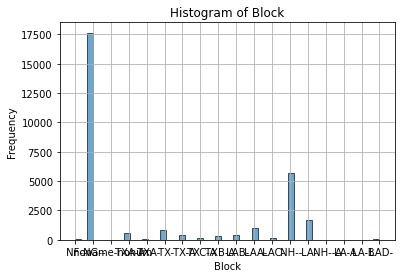

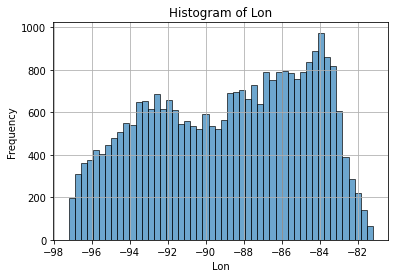

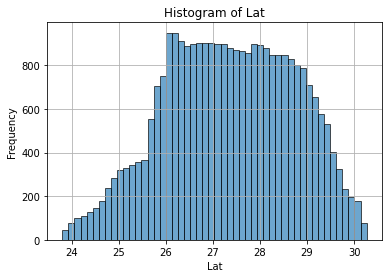

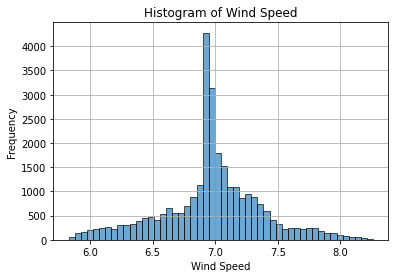

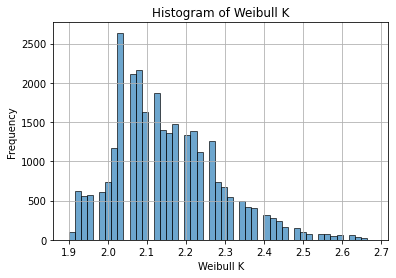

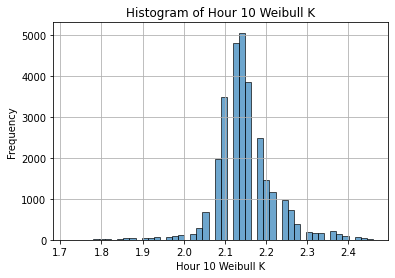

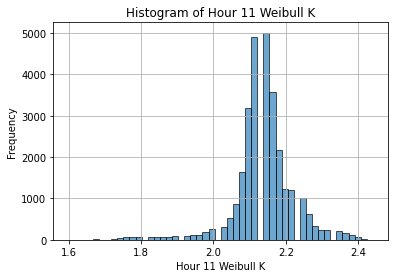

In [36]:
import matplotlib.pyplot as plt

df = reduced_df

for column in df.columns:
    plt.hist(df[column].dropna(), bins=50, edgecolor='k', alpha=0.65)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

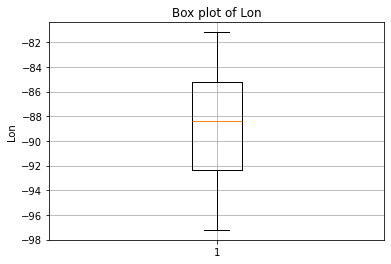

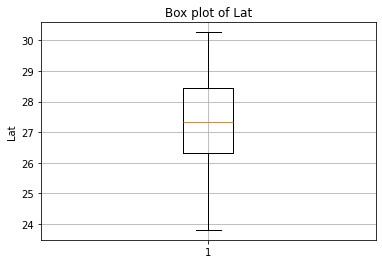

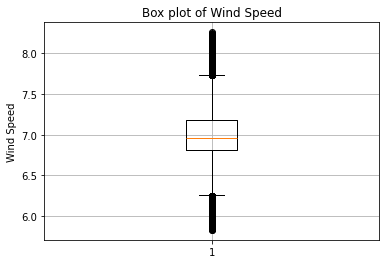

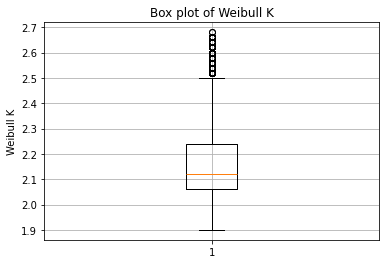

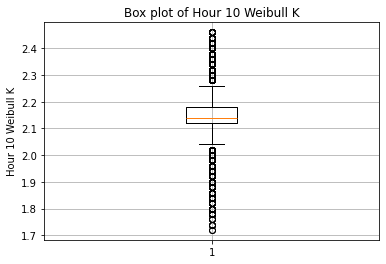

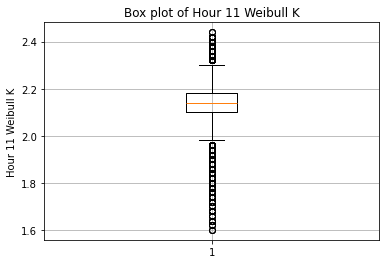

In [38]:
for column in statistics_df.columns:
    plt.boxplot(statistics_df[column].dropna())
    plt.title(f'Box plot of {column}')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


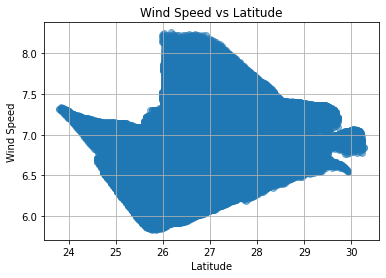

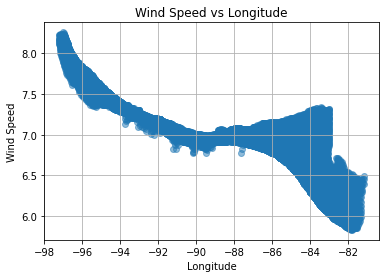

In [39]:
plt.scatter(df['Lat'], df['Wind Speed'], alpha=0.5)
plt.title('Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()

plt.scatter(df['Lon'], df['Wind Speed'], alpha=0.5)
plt.title('Wind Speed vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.show()
